# Visualisation

## Setup

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from amftrack.util.sys import storage_path
import os

/home/ipausers/kahane/Wks/AMFtrack/amftrack/transfer/functions/transfer.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
path = os.path.join(storage_path, "width1/measures/data_width_907_3.json")

with open(path) as f:
    d = json.load(f)

for key in d.keys():
    del d[key]['values']

df = pd.DataFrame(d)
df = df.transpose()

## Visualisation

In [4]:
df

,plate,hypha,pos,order,x,y,value,variance,std_deviation
trunk_001,20220324_Plate907_001,1,middle,9,68260,54300,244,20,4
trunk_002,20220324_Plate907_003,1,middle,8,68540,51840,243,253,15
trunk_003,20220324_Plate907_005,1,middle,7,68420,49340,209,72,8
trunk_004,20220324_Plate907_007,1,top,6,68640,46880,177,92,9
trunk_005,20220324_Plate907_007,1,bottom,5,68640,46880,205,225,15
trunk_006,20220324_Plate907_009,1,middle,4,69220,44380,190,72,8
trunk_007,20220324_Plate907_011,1,top,3,70020,41880,194,4,2
trunk_008,20220324_Plate907_011,1,bottom,2,70020,41880,191,64,8
trunk_009,20220324_Plate907_013,1,top,1,71020,39440,195,11,3
trunk_010,20220324_Plate907_013,1,bottom,0,71020,39440,194,16,4


### Plot a hypha

In [5]:
def plot_hypha(i):
    df_hypha = df[df['hypha']==i]
    x = df_hypha['order']
    y = df_hypha['value']
    ax = plt.gca()
    ax.set_ylim([100, 250])
    plt.plot(x, y)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


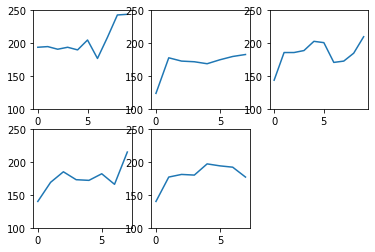

In [6]:
for i in range(1, 6):
    plt.subplot(2, 3, i)
    plot_hypha(i)

### Plot hyphas with standard error

In [7]:
def plot_hypha(i):
    df_hypha = df[df['hypha']==i]
    x = df_hypha['order']
    y = df_hypha['value']
    dy = df_hypha['std_deviation']
    ax = plt.gca()
    ax.set_ylim([100, 250])
    plt.errorbar(x, y, dy)
    plt.title(f"Hypha {df_hypha['hypha'].iloc[0]}")

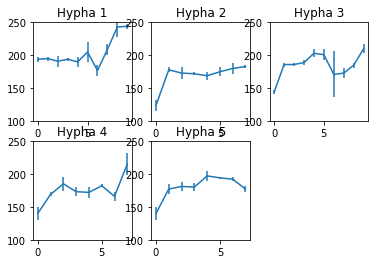

In [8]:
for i in range(1, 6):
    plt.subplot(2, 3, i)
    plot_hypha(i)

### Plot data points

In [9]:
def plot_geometry(i):
    """
    Plot the point where the measure were done in space
    The tip of the hypha has a red dot.
    """
    df_hypha = df[df['hypha']==i]
    x = df_hypha['x']
    y = - df_hypha['y'] # y is inversed in the microscope referential
    plt.plot(x, y, marker="x")
    tip = df_hypha[df_hypha['order']==0]
    plt.plot(tip['x'], -tip['y'], color="red", marker = 'o')
    plt.title(f"Hypha {df_hypha['hypha'].iloc[0]}")

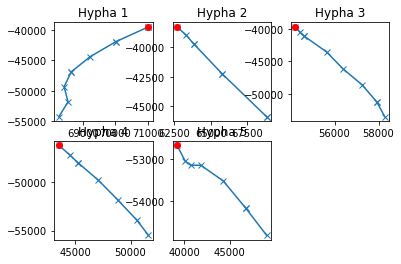

In [10]:
for i in range(1, 6):
    plt.subplot(2, 3, i)
    plot_geometry(i)

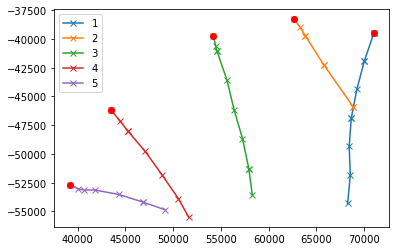

In [27]:
l = []
for i in range(1, 6):
    df_hypha = df[df['hypha']==i]
    x = df_hypha['x']
    y = - df_hypha['y'] # y is inversed in the microscope referential
    plt.plot(x, y, marker="x", label=f"{i}")
    tip = df_hypha[df_hypha['order']==0]
    plt.plot(tip['x'], -tip['y'], color="red", marker = 'o')
plt.legend(loc="upper left")

In [31]:
df[df['hypha']==3]

,plate,hypha,pos,order,x,y,value,variance,std_deviation
trunk_019,20220324_Plate907_023,3,middle,0,54220,39720,144,13,3
trunk_020,20220324_Plate907_024,3,bottom,1,54440,40580,186,11,3
trunk_021,20220324_Plate907_025,3,top,2,54600,41080,186,8,2
trunk_022,20220324_Plate907_025,3,bottom,3,54600,41080,189,19,4
trunk_023,20220324_Plate907_027,3,middle,4,55640,43580,203,36,6
trunk_024,20220324_Plate907_029,3,middle,5,56380,46160,201,69,8
trunk_025,20220324_Plate907_031,3,middle,6,57260,48660,171,1290,35
trunk_026,20220324_Plate907_033,3,top,7,57920,51280,173,80,8
trunk_027,20220324_Plate907_033,3,bottom,8,57920,51280,185,18,4
trunk_028,20220324_Plate907_035,3,middle,9,58280,53540,210,51,7


In [12]:
df[df['order']==0]

,plate,hypha,pos,order,x,y,value,variance,std_deviation
trunk_010,20220324_Plate907_013,1,bottom,0,71020,39440,194,16,4
trunk_011,20220324_Plate907_015,2,middle,0,62680,38280,124,69,8
trunk_019,20220324_Plate907_023,3,middle,0,54220,39720,144,13,3
trunk_029,20220324_Plate907_037,4,middle,0,43520,46200,140,120,10
trunk_044,20220324_Plate907_058,5,middle,0,39180,52660,140,104,10
